In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
gfdebtn_df = pd.read_csv('GFDEBTN.csv')
mehousa_df = pd.read_csv('MEHOINUSA672N.csv')

# Display the first few rows of the DataFrames
print(gfdebtn_df.head())
print(mehousa_df.head())


  observation_date  GFDEBTN
0       1966-01-01   320999
1       1966-04-01   316097
2       1966-07-01   324748
3       1966-10-01   329319
4       1967-01-01   330947
  observation_date  MEHOINUSA672N
0       1984-01-01          58930
1       1985-01-01          60050
2       1986-01-01          62280
3       1987-01-01          63060
4       1988-01-01          63530


In [111]:
from datetime import datetime

# Import Dataframes
gfdebtn_df['observation_date'] = pd.to_datetime(gfdebtn_df['observation_date'])
mehousa_df['observation_date'] = pd.to_datetime(mehousa_df['observation_date'])

# Get the current year
current_year = datetime.now().year

# Filter data for the last 10 years
gfdebtn_last_10_years = gfdebtn_df[gfdebtn_df['observation_date'].dt.year >= current_year - 10]
mehousa_last_10_years = mehousa_df[mehousa_df['observation_date'].dt.year >= current_year - 10]

# Display the filtered data
print(gfdebtn_last_10_years.head())
print(mehousa_last_10_years.head())


    observation_date   GFDEBTN
196       2015-01-01  18152056
197       2015-04-01  18151998
198       2015-07-01  18150618
199       2015-10-01  18922179
200       2016-01-01  19264939
   observation_date  MEHOINUSA672N
31       2015-01-01          71000
32       2016-01-01          73520
33       2017-01-01          74810
34       2018-01-01          75790
35       2019-01-01          81210


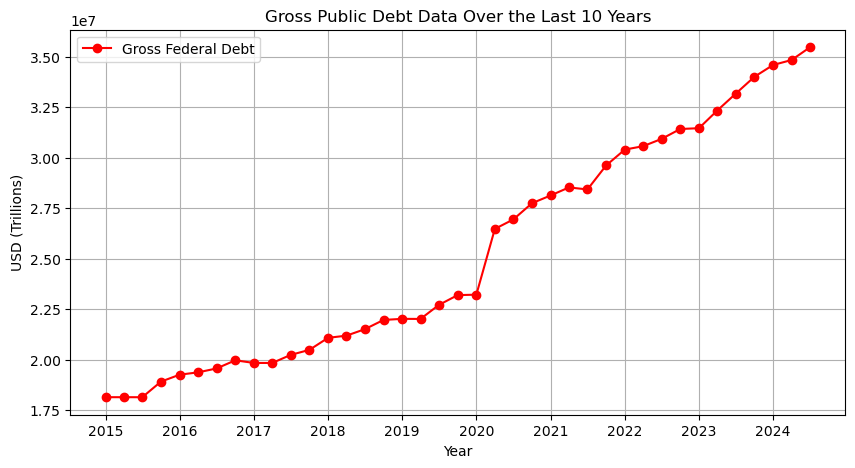

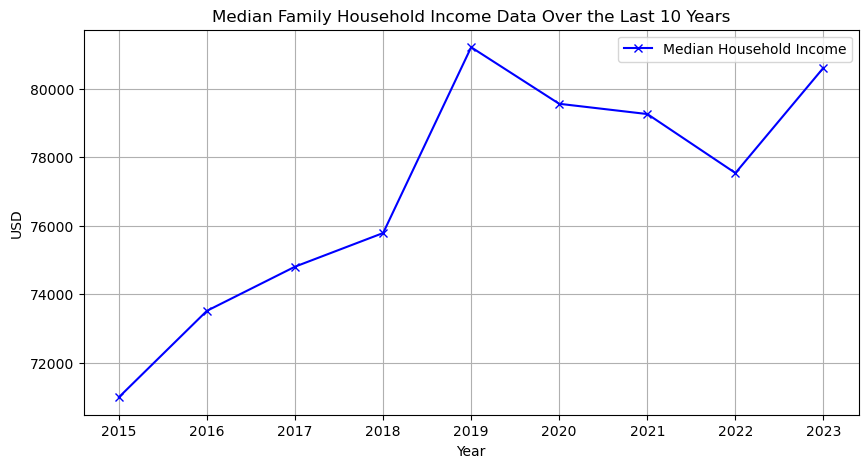

In [112]:
# Line graph for GFDEBTN data
plt.figure(figsize=(10, 5))
plt.plot(gfdebtn_last_10_years['observation_date'], gfdebtn_last_10_years['GFDEBTN'], label='Gross Federal Debt', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('USD (Trillions)')
plt.title('Gross Public Debt Data Over the Last 10 Years')
plt.legend()
plt.grid(True)
plt.savefig('../Graphs/TotalPublicDebtLineGraph.png')
plt.show()

# Line graph for MEHOINUSA672N data
plt.figure(figsize=(10, 5))
plt.plot(mehousa_last_10_years['observation_date'], mehousa_last_10_years['MEHOINUSA672N'], label='Median Household Income', color='blue', marker='x')
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('Median Family Household Income Data Over the Last 10 Years')
plt.legend()
plt.grid(True)
plt.savefig('../Graphs/Median_Household_LineGraph.png')
plt.show()


  observation_date  GFDEBTN
0       1966-01-01   320999
1       1966-04-01   316097
2       1966-07-01   324748
3       1966-10-01   329319
4       1967-01-01   330947
  observation_date  MEHOINUSA672N
0       1984-01-01          58930
1       1985-01-01          60050
2       1986-01-01          62280
3       1987-01-01          63060
4       1988-01-01          63530


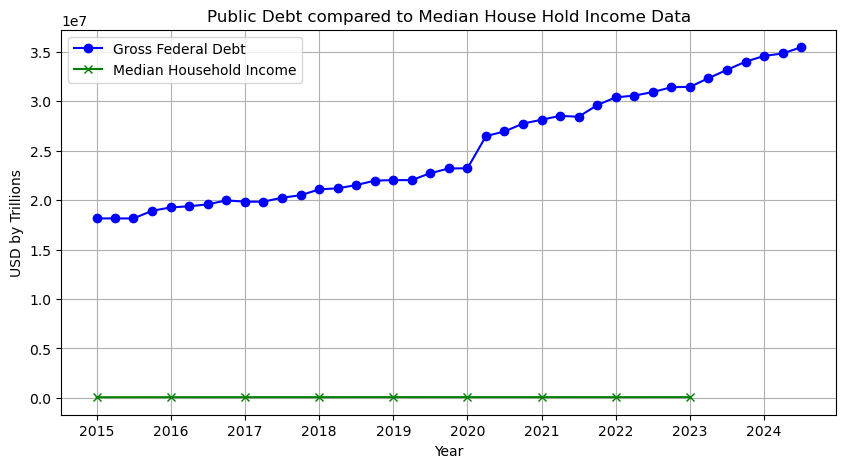

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV files into DataFrames
gfdebtn_df = pd.read_csv('GFDEBTN.csv')
mehousa_df = pd.read_csv('MEHOINUSA672N.csv')

# Check the first few rows
print(gfdebtn_df.head())
print(mehousa_df.head())

# Convert the 'observation_date' column to datetime
gfdebtn_df['observation_date'] = pd.to_datetime(gfdebtn_df['observation_date'])
mehousa_df['observation_date'] = pd.to_datetime(mehousa_df['observation_date'])

# Current year
current_year = datetime.now().year

# Filter for 10 years
gfdebtn_last_10_years = gfdebtn_df[gfdebtn_df['observation_date'].dt.year >= current_year - 10]
mehousa_last_10_years = mehousa_df[mehousa_df['observation_date'].dt.year >= current_year - 10]

# Line graph
plt.figure(figsize=(10, 5))
plt.plot(gfdebtn_last_10_years['observation_date'], gfdebtn_last_10_years['GFDEBTN'], label='Gross Federal Debt', color='blue', marker='o')
plt.plot(mehousa_last_10_years['observation_date'], mehousa_last_10_years['MEHOINUSA672N'], label='Median Household Income', color='green', marker='x')
plt.xlabel('Year')
plt.ylabel('USD by Trillions')
plt.title('Public Debt compared to Median House Hold Income Data')
plt.legend()
plt.grid(True)
plt.savefig('../Graphs/comparison_chart.png')
plt.show()

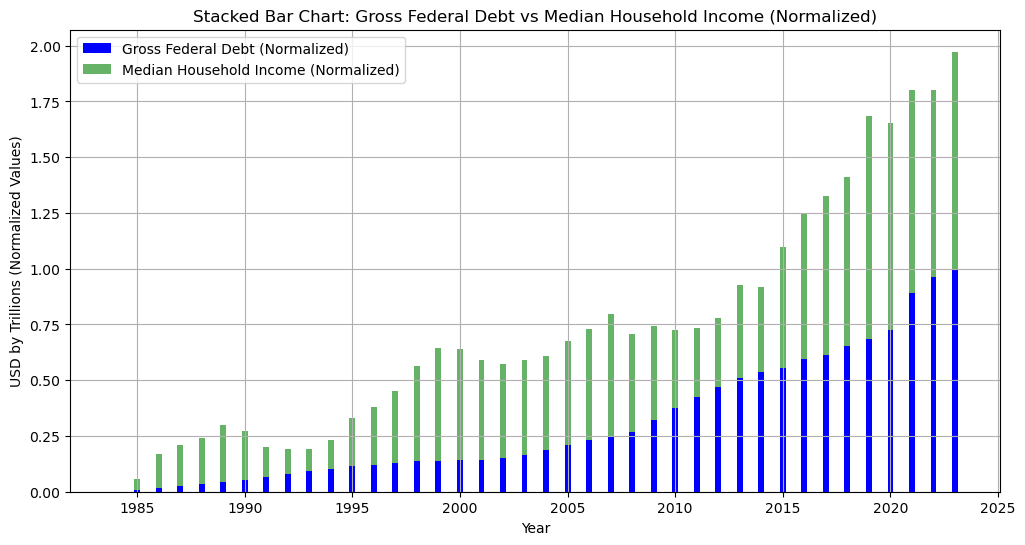

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV data
debt_data = pd.read_csv('GFDEBTN.csv')
income_data = pd.read_csv('MEHOINUSA672N.csv')

# Format Dates
debt_data['observation_date'] = pd.to_datetime(debt_data['observation_date'])
income_data['observation_date'] = pd.to_datetime(income_data['observation_date'])

# Merge the datasets
merged_data = pd.merge(debt_data, income_data, on='observation_date')

# Extract columns
common_years = merged_data['observation_date']
debt_values = merged_data['GFDEBTN'].values.reshape(-1, 1)
income_values = merged_data['MEHOINUSA672N'].values.reshape(-1, 1)

# Normalized Data - had to look up how to do this but it helped with some errors I was having displaying
scaler = MinMaxScaler()
normalized_debt = scaler.fit_transform(debt_values).flatten()
normalized_income = scaler.fit_transform(income_values).flatten()

# Set the bar width - otherwise too thin
bar_width = 100 

# Plot stacked bar chart
plt.figure(figsize=(12, 6))

plt.bar(common_years, normalized_debt, label='Gross Federal Debt (Normalized)', color='blue', width=bar_width)
plt.bar(common_years, normalized_income, bottom=normalized_debt, label='Median Household Income (Normalized)', color='green', alpha=0.6, width=bar_width)

plt.xlabel('Year')
plt.ylabel('USD by Trillions (Normalized Values)')
plt.title('Stacked Bar Chart: Gross Federal Debt vs Median Household Income (Normalized)')
plt.legend()
plt.grid(True)

# Show and save the plot
plt.savefig('../Graphs/bar_chart.png')
plt.show()


<Figure size 1200x600 with 0 Axes>

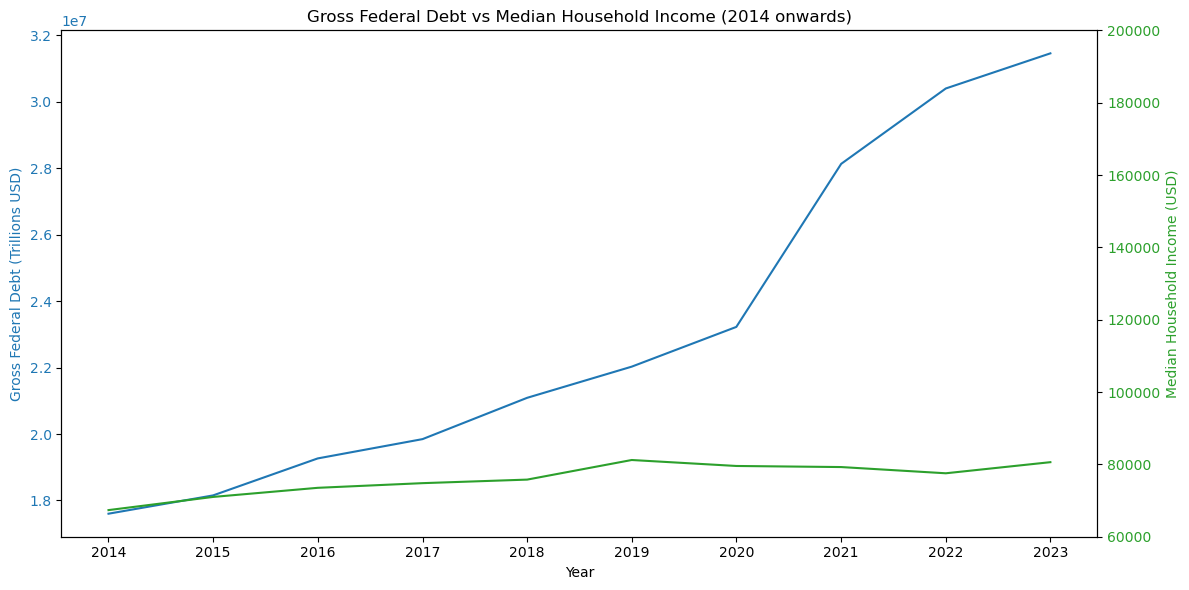

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
debt_data = pd.read_csv('GFDEBTN.csv')
income_data = pd.read_csv('MEHOINUSA672N.csv')

# Format Dates
debt_data['observation_date'] = pd.to_datetime(debt_data['observation_date'])
income_data['observation_date'] = pd.to_datetime(income_data['observation_date'])

# Filter ddata for 2014+
debt_data = debt_data[debt_data['observation_date'] >= '2014-01-01']
income_data = income_data[income_data['observation_date'] >= '2014-01-01']

# Merge the datasets on the observation_date column
merged_data = pd.merge(debt_data, income_data, on='observation_date')

# Extract columns
common_years = merged_data['observation_date']
debt_values = merged_data['GFDEBTN']
income_values = merged_data['MEHOINUSA672N']

plt.figure(figsize=(12, 6))

# Plot Gross Federal Debt with primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Gross Federal Debt (Trillions USD)', color=color)
ax1.plot(common_years, debt_values, label='Gross Federal Debt', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot Median Household Income with secondary y-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Median Household Income (USD)', color=color)
ax2.plot(common_years, income_values, label='Median Household Income', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([60000, 200000])  # Adjust y-axis limit if needed

plt.title('Gross Federal Debt vs Median Household Income (2014 onwards)')
fig.tight_layout()

plt.savefig('../Graphs/bar_chart_corrected_2014.png')
plt.show()
